In [1]:
import tensorflow.compat.v2 as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# reconstruct the model identically.
my_model = tf.keras.models.load_model("my_model")
# my_model = tf.keras.models.load_model("my_model.h5")

<dtype: 'float32'>
(28, 28, 3)


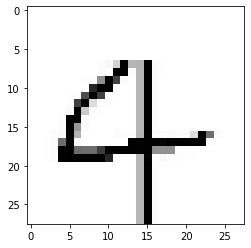

In [38]:
img_raw = tf.io.read_file("imgs/4_001.jpg")
image = tf.image.decode_jpeg(img_raw)
image = tf.image.convert_image_dtype(image, tf.float32)
image = tf.image.resize(image, [28, 28])
plt.imshow(image)

print(image.dtype)
print(image.shape)


<dtype: 'float32'>
(28, 28, 1)
<dtype: 'float32'>
(1, 28, 28, 1)


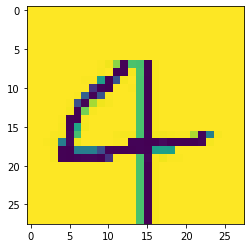

In [39]:
gray_img = tf.image.rgb_to_grayscale(image)
plt.imshow(gray_img[...,0])

print(gray_img.dtype)
print(gray_img.shape)

gray_img_arr = tf.expand_dims(gray_img, 0)

print(gray_img_arr.dtype)
print(gray_img_arr.shape)

In [40]:
output_data = my_model.predict(gray_img_arr)
np.argmax(output_data[0])

2

<dtype: 'float32'>
(28, 28, 1)
<dtype: 'float32'>
(1, 28, 28, 1)


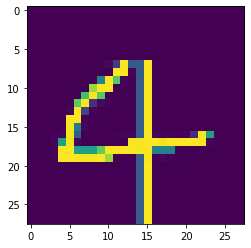

In [41]:
bw_img = 1.0 - gray_img
plt.imshow(bw_img[...,0])


print(bw_img.dtype)
print(bw_img.shape)

bw_img_arr = tf.expand_dims(bw_img, 0)

print(bw_img_arr.dtype)
print(bw_img_arr.shape)

In [42]:
output_data = my_model.predict(bw_img_arr)
np.argmax(output_data[0])

5

<dtype: 'float32'>
(1, 28, 28, 1)


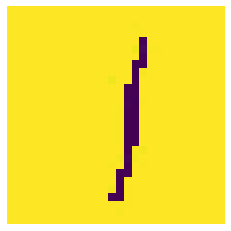

In [28]:

from tensorflow.keras.preprocessing.image import img_to_array, load_img
from matplotlib import pyplot as plt

image = load_img("imgs/1_001.jpg", color_mode="grayscale", target_size=(28,28))

plt.imshow(image)
plt.axis('off')


image_array = img_to_array(image)
image_array = tf.expand_dims(image_array, 0)

print(image_array.dtype)
print(image_array.shape)

In [29]:
import numpy as np
output_data = my_model.predict(image_array)
np.argmax(output_data[0])


5

In [30]:
preds = my_model.predict_classes(image_array)
print(preds)

[5]


In [ ]:
print(output_data)